In [1]:
import os
from qiskit_ibm_provider import IBMProvider

# Get IBM Quantum account from environment variable
ibmq_token = os.getenv('IBM_QUANTUM_TOKEN')

In [2]:
if ibmq_token is None:
    raise ValueError("IBM Quantum Token not found in environment variables. Please set it.")

# Print the token to verify
print(f"Retrieved IBM Quantum Token: {ibmq_token}")
# Create an instance of IBMProvider
provider = IBMProvider(ibmq_token)
#check if the instance is connected or not ??

if provider :
    print("connected to server")

Retrieved IBM Quantum Token: 1e97339b0886ae7a1f45d65dc09ecf6375e1ebbefa9c063a5bbcfd51526fed2d5b2006975a94c37b8b33e57f173cf6d1bb86be5c58f0c099842dd1b63317c941
connected to server


In [3]:
available_backends = provider.backends()
show_backend = print(available_backends)
choose = input("Enter the name of the backend you want to choose : ")

backend = next((backend for backend in available_backends if str(backend) == choose), None)
if backend is None:
    print("No backend found with the name:", choose) 

[<IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>]


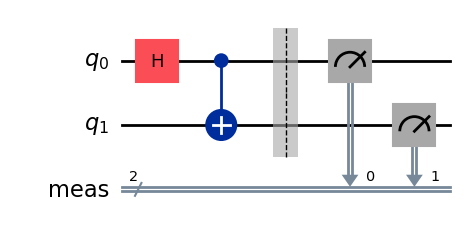

In [4]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0) # Add a Hadamard gate to qubit 0
qc.cx(0, 1) # Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.measure_all() # Measure all qubits

''' Return a drawing of the circuit using MatPlotLib ("mpl"). This is the last line of the cell, 
so the drawing appears in the cell output. Remove the "mpl" argument to get a text drawing. '''
qc.draw('mpl')

In [5]:
# import the required libraries
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator

In [6]:
# Set up six different observables.
observables_labels = ["ZZ", "ZI", "IZ", "XX", "XI"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [8]:
service = QiskitRuntimeService('ibm_cloud')

IBMNotAuthorizedError: '401 Client Error: Unauthorized for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'

In [ ]:
# construct the estimator instance we want to use
service = QiskitRuntimeService()
estimator = Estimator(backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000
 

In [ ]:
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
observables = [observable.apply_layout(isa_circuit.layout) for observable in observables]

In [ ]:
# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, observables)])
 
# This is the result of the entire submission.  We submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()
 
# This is the result from our single pub, which had five observables,
# so contains information on all five.
pub_result = job.result()[0]

In [ ]:
# Plot the result
 
from matplotlib import pyplot as plt
 
data = observables_labels
values = pub_result.data.evs
 
errors = pub_result.data.ensemble_standard_error
 
plt.errorbar(observables_labels, values, yerr=errors, fmt="o")